In [1]:
import torch
import torch.nn as nn
from torch.optim import adam
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
BASE_DIR = "/home/sid/Drive_D/auto_encoders/" # Change this to your base directory
DATA_DIR = os.path.join(BASE_DIR, "data")

if not os.path.exists(DATA_DIR):
    print(f"{DATA_DIR} doesn't exist. Creating one!", DATA_DIR)
    os.mkdir(DATA_DIR)

# We will be working with the simplest image dataset out there: MNIST.

# Defining the transforms

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts images to PyTorch tensors and scales to [0, 1]
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Data augmentation
])

# Downloading the dataset

In [4]:
mnist_test = datasets.MNIST(DATA_DIR, transform=transform, download=True, train=False)
mnist_train = datasets.MNIST(DATA_DIR, transform=transform, download=True, train=True)

In [5]:
train_dataloader = DataLoader(mnist_train, 
                                batch_size=100,
                                shuffle=True,
                                num_workers=10
                             )
test_dataloader = DataLoader(mnist_test, 
                                batch_size=100,
                                shuffle=False,
                                num_workers=10
                             )

# Let's look at an image example from the training set

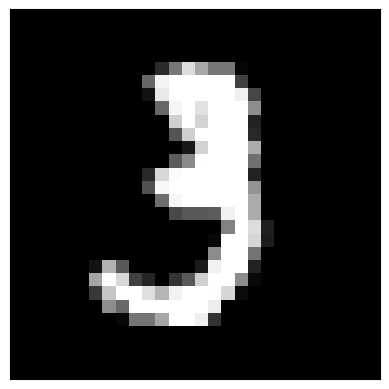

In [6]:
def plot_image(tensor_img):
    plt.imshow(transforms.ToPILImage()(tensor_img), cmap='gray')
    plt.xticks([])
    plt.yticks([]);
plot_image(mnist_train[10][0])

# Utility functions

In [7]:
def train(model, optimizer, criterion, train_loader, epochs):
    from tqdm import tqdm
    for epoch in range(epochs):
        running_loss = 0.0
        progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}", leave=True)
    
        for batch in progress_bar:
            image, _ = batch
            image = image.to(device)
            B, C,H, W = image.shape
            optimizer.zero_grad()
            logits = model.forward(image)
            loss = criterion(logits, image)
    
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item()
    
            # Update progress bar with loss
            progress_bar.set_postfix(loss=loss.item())
        
        print(f"Epoch {epoch+1}: Avg Loss: {running_loss / len(train_dataloader):.6f}")

In [8]:
@torch.no_grad()
def inference(model, input_tensor):
    C, W, H = input_tensor.shape
    reconstructed = input_tensor.reshape((C, -1))
    return reconstructed.view(C, W, H)

In [ ]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        pass

    def encoder(self, x):
        pass
    
    def decoder(self, x):
        pass
    
    def reparameterization(self, x):
        pass
    
    def forward(self, x):
        pass


